Analisis de Datos de los Lanzamientos de Misiones Espaciales desde 1957

Descripcióm

Este proyecto busca mejorar la calidad y estructurar los datos, además de analizar las tendencias y patrones de las misiones espaciales a lo largo del tiempo. 

Objetivo

* Limpieza y transformación de datos
* Análisis exploratorio y visualización de los datos


Preguntas a resolver
   - ¿Qué organización lanzo mas misiones espaciales en un año determinado?
   - ¿Cuántos lanzamientos se realizaron por año?
   - ¿Cómo ha variado el costo de las misiones espaciales a lo largo del tiempo?
   - ¿Cuáles son los meses mas populares para hacer lanzamientos?
   - ¿A lo largo de los años se ha tenido mejor tasa de éxito o la probabilidad de fracaso se ha mantenido con los años?

Herramientas utilizadas

* Python
    - Pandas
    - numpy
    - seaborn
    - matplotlib
    - datetime


* El Dataset usado fue "All Space Missions from 1957" extraído de Kaggle
          

1. Importación de las librerias y datos

In [362]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

In [364]:
df = pd.read_csv("E:/Natsu E/Data science/Project/Space_Corrected.csv")

2. Revisión de los Datos

In [367]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


3. Preprocesamiento de datos

In [372]:
#Se genera una copia del dataframe para evitar resultados inesperados
data = df.copy() 

3. Transformación

       3.1 Eliminación de columnas 

In [375]:
#Se eliminan las columnas 'Unnamed: 0' y 'Unnamed: 0.1' debido a que estan duplicadas y debido a que no aportan ninguna informacion útil
columnas_para_eliminar = ['Unnamed: 0', 'Unnamed: 0.1'] 
data.drop(columnas_para_eliminar, axis=1, inplace=True)

In [377]:
data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [379]:
print(data.columns)

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')


    3.2 Renombramiento de Columnas
    Se renombra algunas columnas para que resulte mas facíl trabajar con ellas, en especial la columna ' Rocket' la cual contaba con un espacio en su inicio


In [382]:
data.rename(columns={'Company Name': 'Company', 
                     'Datum': 'Date', 
                     ' Rocket': 'Mission Cost'}, inplace=True)

In [384]:
print(data.columns)

Index(['Company', 'Location', 'Date', 'Detail', 'Status Rocket',
       'Mission Cost', 'Status Mission'],
      dtype='object')


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5   Mission Cost    964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


    3.3 Generación de columnas 'Day', 'Month' & 'Year' a partir de la columna 'Date'

In [389]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce') #Con esto si alguna fecha no se puede convertir, sera reemplazada por NaT, lo cual evitara errores

In [391]:
data['Day'] = data['Date'].dt.strftime('%A')
data['Month'] = data['Date'].dt.strftime('%B')
data['Year'] = data['Date'].dt.strftime('%Y')

In [393]:
data.head()

,Company,Location,Date,Detail,Status Rocket,Mission Cost,Status Mission,Day,Month,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Friday,August,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thursday,August,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tuesday,August,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thursday,July,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thursday,July,2020


4. Analisis de la Organización con mas misiones en un año

       4.1 Identificacion, filtración y agrupación de organizaciones
   Esto se realizo con el fin de solo seleccionar las 20 organizaciones con mas misiones espaciales, ya que al ser tantas organizaciones el grafico puede tornarse poco agradable a la vista

In [396]:
#Identificamos las 20 organizaciones con mas misiones espaciales
top_20_orgs = data['Company'].value_counts().head(20).index 

In [398]:
# Filtramos las 20 organizaciones con mas misiones
filtered_data = data[data['Company'].isin(top_20_orgs)] 

In [400]:
# Agrupamos por las organizaciones filtradas y por año
missions_per_year_org_filtered = filtered_data.groupby(['Year', 'Company']).size().reset_index(name='Mission_Count')

In [402]:
# Generamos un dataframe pivotado para nuestro gráfico 
max_missions_pivot_filtered = missions_per_year_org_filtered.pivot(index='Year', columns='Company', values='Mission_Count').fillna(0)

In [404]:
# Con esta funcion podemos encontrar el valor maximo de misiones
max_value = max_missions_pivot_filtered.sum(axis=1).max()

In [406]:
# Generamos una paleta de colores diferenciada para evitar confusiones en el gráfico
palette = sns.color_palette("tab20", 20)

<Figure size 1200x600 with 0 Axes>

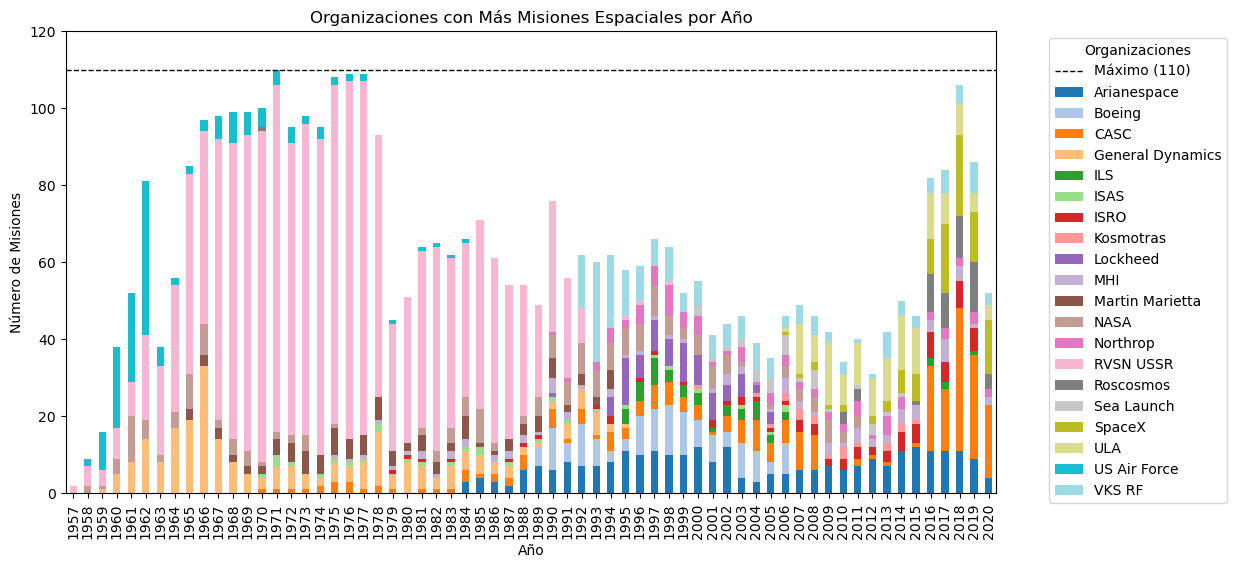

In [408]:
plt.figure(figsize=(12, 6))
ax = max_missions_pivot_filtered.plot(kind='bar', stacked=True, figsize=(12, 6), color=palette)
plt.title('Organizaciones con Más Misiones Espaciales por Año')
plt.xlabel('Año')
plt.ylabel('Número de Misiones')
plt.ylim(0, max_value + 10)
plt.axhline(y=max_value, color='k', linestyle="dashed", linewidth=1, label=f'Máximo ({int(max_value)})')
plt.legend(title='Organizaciones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()


* Gracias al grafico podemos observar que la organización que lanzo mas misiones en un año, es US Air Force en el año 1971 con un 110 misiones

5. Lanzamientos por Año

In [412]:
#Aumentamos el número maximo de filas mostradas, para una mejor visualización
pd.options.display.max_rows = None

In [414]:
#Agrupamos los datos por año y para contar los lanzamientos
launches_per_year = data.groupby('Year').size().reset_index(name='Launch_Count')
display(launches_per_year)


,Year,Launch_Count
0,1957,3
1,1958,22
2,1959,20
3,1960,38
4,1961,52
5,1962,81
6,1963,38
7,1964,56
8,1965,86
9,1966,98


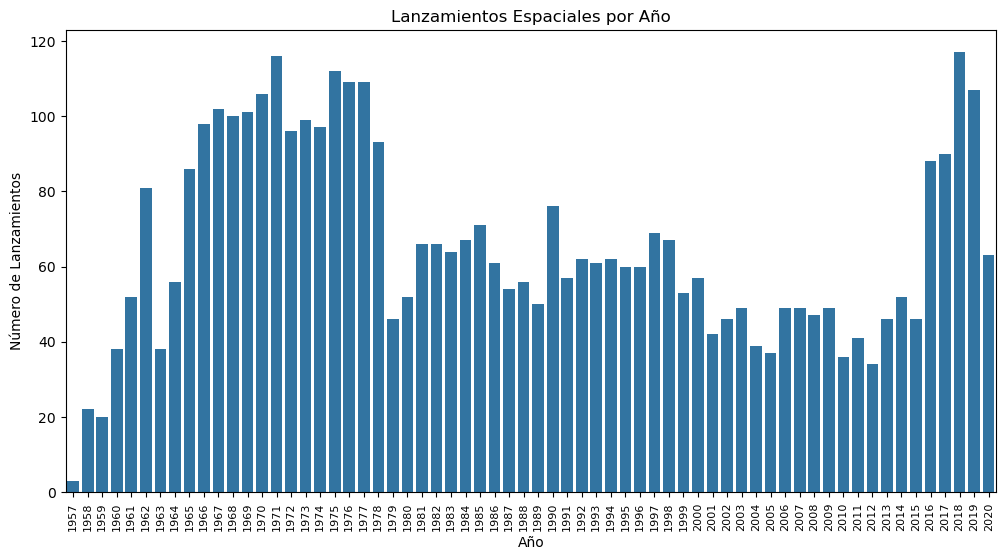

In [416]:
plt.figure(figsize=(12, 6))
sns.barplot(data=launches_per_year, x='Year', y='Launch_Count')
plt.title('Lanzamientos Espaciales por Año')
plt.xlabel('Año')
plt.ylabel('Número de Lanzamientos')
plt.xticks(rotation=90, fontsize=8)
plt.show()


6. Variación del costo de las misiones espaciales a lo largo del tiempo

In [419]:
#Convertimos la Columna 'Mission Cost' a tipo numerico, para evitar posibles errores
data['Mission Cost'] = pd.to_numeric(data['Mission Cost'], errors='coerce') 

print(data['Mission Cost'].head())

0     50.00
1     29.75
2       NaN
3     65.00
4    145.00
Name: Mission Cost, dtype: float64


In [421]:
#Excluimos los NaN de la columna Mission Cost
data_cost_filtered = data.dropna(subset=['Mission Cost'])

In [423]:
#Agrupamos las misiones por año y calculamos la suma del costo de las misiones
cost_variation = data_cost_filtered.groupby('Year')['Mission Cost'].sum().reset_index()
display(cost_variation)


,Year,Mission Cost
0,1964,126.46
1,1965,126.46
2,1966,177.00
3,1967,354.00
4,1968,472.00
5,1969,236.00
6,1981,900.00
7,1982,1380.80
8,1983,1830.80
9,1984,2280.80


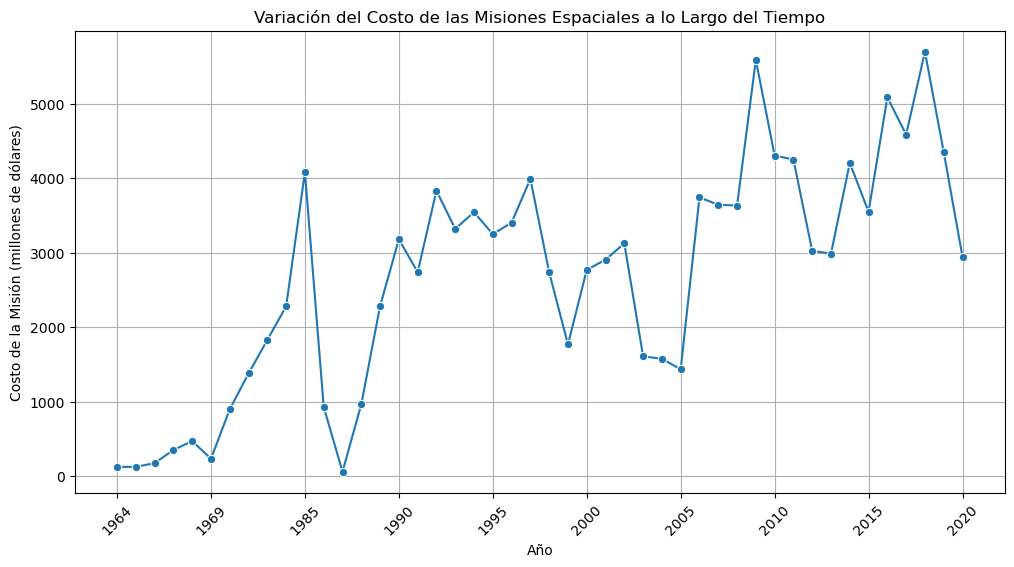

In [425]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cost_variation, x='Year', y='Mission Cost',marker='o')
plt.title('Variación del Costo de las Misiones Espaciales a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Costo de la Misión (millones de dólares)')
plt.xticks(rotation=45)
plt.grid(True)
ax = plt.gca() 
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()


* Desde la mitad de 1964 hasta 1969 es el periodo con los costos mas bajos
* A partir de la decada de 1970 hubo un aumento bastante notable en los costos de las misiones espaciales, este aumento duro y tuvo su pico hasta 1985
* Desde 1985 surge una abrupta caida en los costos hasta 1987
* Luego de la abrupta caida en 1987 se vuelve a tener un incremento en costo hasta 1990 donde este varia con los años subiendo y bajando, pero permaneciendo siempre con tendencia a subir, hasta 1997 donde se tendria una tendencia a la baja en los costos por 3 años
* A partir de 1999 nuevamente habria un aumento en los costos pero con picos intermitentes, fluctuando considerablemente
  

7. Meses mas populares donde se realizan lanzamientos

In [429]:
#Agrupamos por mes y contamos los lanzamientos
launches_per_month = data.groupby('Month').size().reset_index(name='Launch_Count')

In [431]:
#Determinamos el valor maximo de 'Launch_Count'
max_value_month = launches_per_month['Launch_Count'].max()

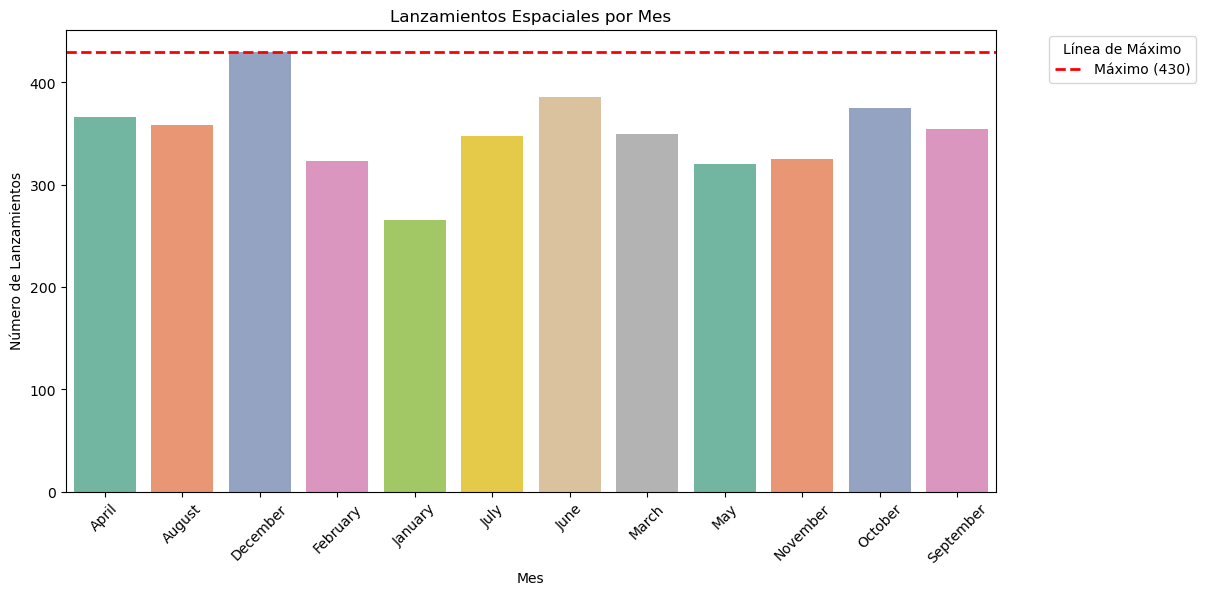

In [433]:
palette = sns.color_palette("Set2", 12)
plt.figure(figsize=(12, 6))
sns.barplot(data=launches_per_month, x='Month', y='Launch_Count', hue='Month', palette=palette)
plt.title('Lanzamientos Espaciales por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Lanzamientos')
plt.xticks(rotation=45)
plt.axhline(y=max_value_month, color='r', linestyle='--', linewidth=2, label=f'Máximo ({max_value_month})')
plt.legend(title='Línea de Máximo', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

* Los meses mas populares en los cuales se realizan mas lanzamientos es Diciembre con 430, seguido de Junio y Octubre con casi 400 lanzamiento
* En contra parte el mes en el cual se realizan menos es Enero

* Tasa de Exito en la misiones a lo largo del tiempo

In [437]:
#Generamos una columna binaria para el exito o fracaso de la misión
data['Success'] = data['Status Mission'].apply(
    lambda x:1 if x== 'Success' else 0)

#Calculamos la tasa de exito por año
success_rate_per_year = data.groupby('Year')['Success'].mean().reset_index(name='Success_Rate')

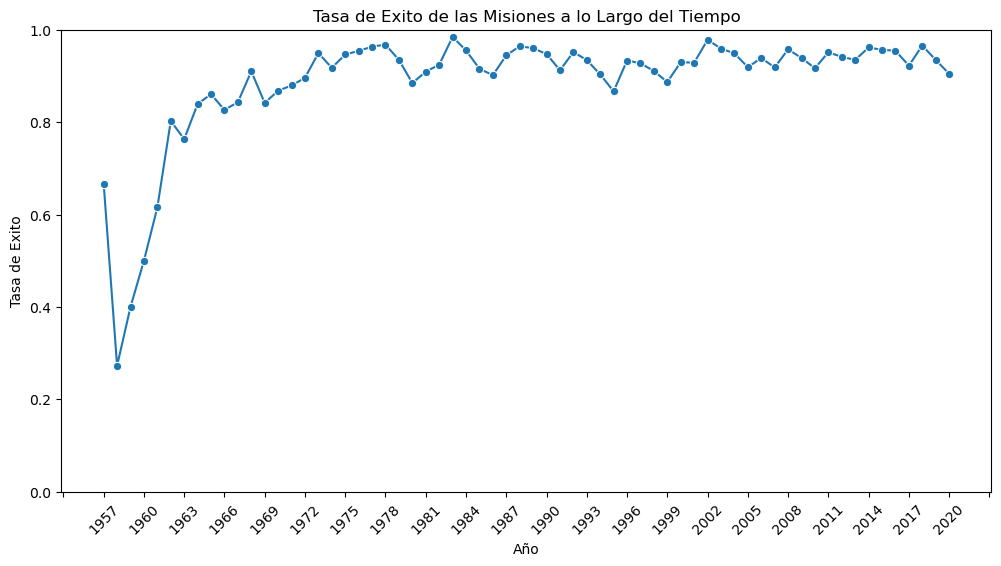

In [439]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=success_rate_per_year, x='Year', y='Success_Rate', marker='o')
plt.title('Tasa de Exito de las Misiones a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Tasa de Exito')
plt.ylim(0, 1)
plt.xticks(rotation=45)
ax = plt.gca() 
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

plt.show()

* Entre 1958 a 1961 podemos observar que la tasa de fracaso es mayor a la tasa de exito, sin embargo tambien en 1958 comenzaria la tendencia a aumentar, y la tasa de exito llegaria en 1963 a ser muy constante con un 80%, donde solo bajaría en el siguiente año 1964 y a partir de allí nuevamente se mantendría como minimo en una tasa de exito de 80% fluctuando y teniendo picos, entre los 80% a 100% hasta el año 2020